In [2]:
import pandas as pd
data=pd.read_csv("../Inputs/data/raw_data/BrentOilPrices.csv")

In [2]:
data.head(100)

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
95,01-Oct-87,18.50
96,02-Oct-87,18.65
97,05-Oct-87,18.78
98,06-Oct-87,18.60


/tmp/ipykernel_49478/1925058986.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_prices['Date'] = pd.to_datetime(brent_prices['Date'])


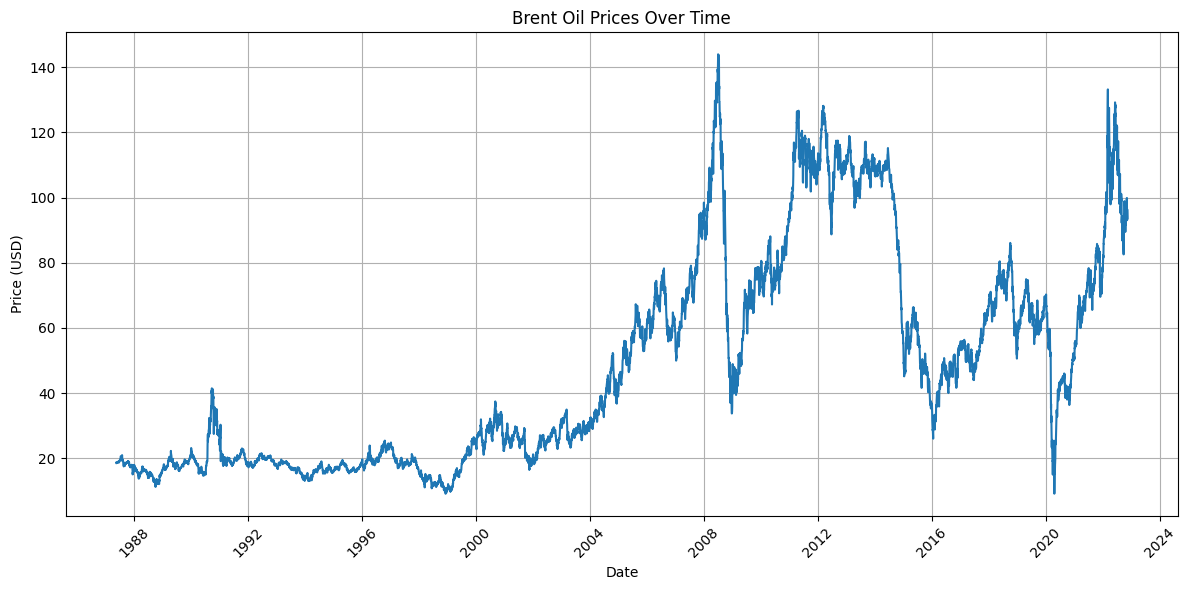

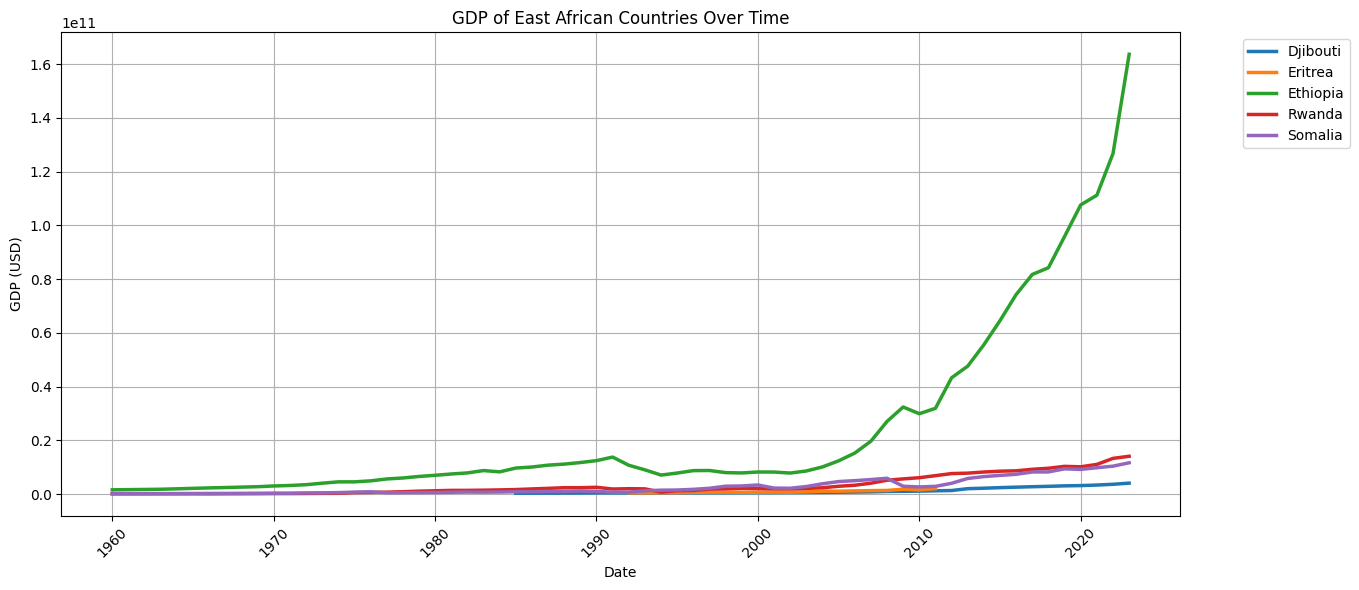

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
brent_prices = pd.read_csv('../Inputs/data/processed_data/cleaned_brent_prices_data.csv')
gdp_data = pd.read_csv('../Inputs/data/processed_data/cleaned_gdp_data.csv')

# Assuming 'Date' column in brent_prices is in datetime format, if not, convert it
brent_prices['Date'] = pd.to_datetime(brent_prices['Date'])

# Filter GDP data for sub-Saharan countries
sub_saharan_countries = ['Djibouti', 'Eritrea', 'Ethiopia','Kenya', 'Rwanda','Somalia', 'South Sudan', 'Sudan','Uganda', ]

gdp_data_sub_saharan = gdp_data[gdp_data['Country Name'].isin(sub_saharan_countries)]

# Plot Brent Oil Prices
plt.figure(figsize=(12, 6))
sns.lineplot(data=brent_prices, x='Date', y='Price')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot GDP Data for sub-Saharan countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=gdp_data_sub_saharan, x='date', y='GDP', hue='Country Name', palette='tab10', linewidth=2.5)
plt.title('GDP of East African Countries Over Time')
plt.xlabel('Date')
plt.ylabel('GDP (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [15]:
brent_prices = pd.read_csv('../Inputs/data/processed_data/cleaned_brent_prices_data.csv')
gdp_data = pd.read_csv('../Inputs/data/processed_data/cleaned_gdp_data.csv')

In [16]:
brent_prices.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [18]:
gdp_data.head()

,date,GDP,Country Name
0,2022,3.544708e+09,Aruba
1,2021,3.103184e+09,Aruba
2,2020,2.558906e+09,Aruba
3,2019,3.395799e+09,Aruba
4,2018,3.276184e+09,Aruba


/tmp/ipykernel_446523/563998338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_prices['Date'] = pd.to_datetime(brent_prices['Date'])
/tmp/ipykernel_446523/563998338.py:35: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax2 = sns.lineplot(data=merged_data, x='Date', y='GDP', hue='Country Name', palette='tab10', linewidth=1.5, ax=ax2)


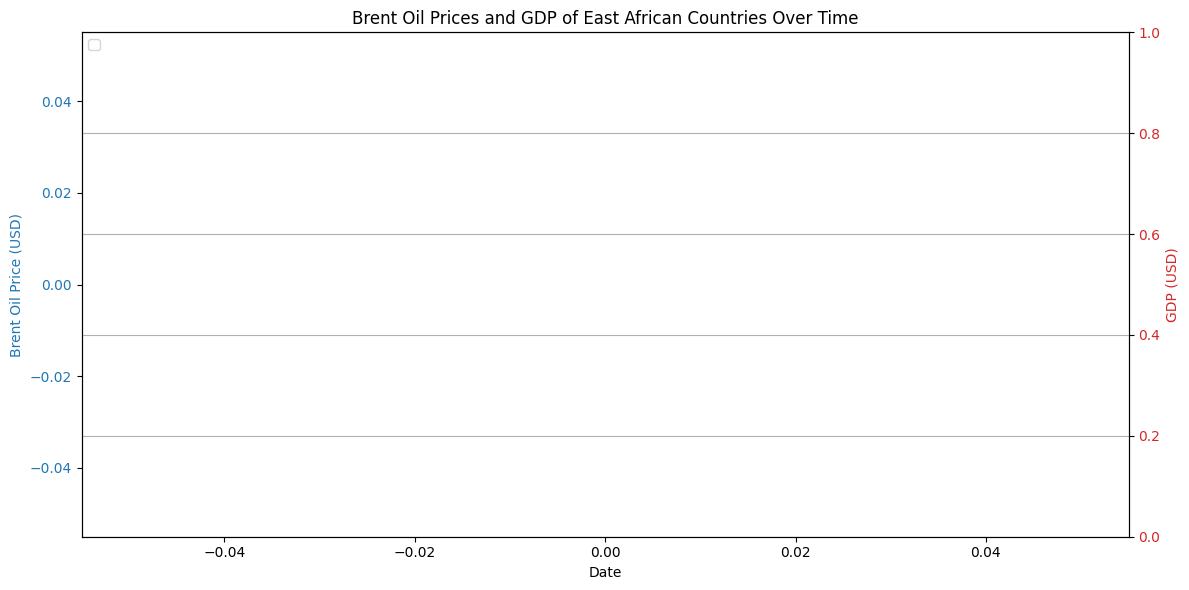

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
brent_prices = pd.read_csv('../Inputs/data/processed_data/cleaned_brent_prices_data.csv')
gdp_data = pd.read_csv('../Inputs/data/processed_data/cleaned_gdp_data.csv')

# Convert 'Date' columns to datetime format
brent_prices['Date'] = pd.to_datetime(brent_prices['Date'])
gdp_data['date'] = pd.to_datetime(gdp_data['date'])

# Filter GDP data for East African countries
east_african_countries = ['Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Rwanda', 'Somalia', 'South Sudan', 'Sudan', 'Uganda']
gdp_data_east_africa = gdp_data[gdp_data['Country Name'].isin(east_african_countries)]

# Merge Brent prices and GDP data on Date
merged_data = pd.merge(brent_prices, gdp_data_east_africa, left_on='Date', right_on='date')

# Plot Brent Oil Prices and GDP for East African Countries
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Brent Oil Prices
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Brent Oil Price (USD)', color=color)
ax1 = sns.lineplot(data=merged_data, x='Date', y='Price', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Brent Oil Prices and GDP of East African Countries Over Time')

# Create a secondary y-axis for GDP
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('GDP (USD)', color=color)
ax2 = sns.lineplot(data=merged_data, x='Date', y='GDP', hue='Country Name', palette='tab10', linewidth=1.5, ax=ax2)
ax2.tick_params(axis='y', labelcolor=color)

# Adding legend for GDP plot
lines, labels = ax2.get_legend_handles_labels()
ax2.legend(lines, labels, loc='upper left')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
